In [1]:
path = '/mnt/t3nfs01/data01/shome/musella/Analysis/FGG_8_0_26_patch1/src/diphotons/Utils/macro/www/higgs/hh/cat_opt'

In [2]:
import glob

In [3]:
files = glob.glob('%s/*mjj_cut_cat[0-9]_*node*/cat_opt.json' % path)

In [4]:
files

['/mnt/t3nfs01/data01/shome/musella/Analysis/FGG_8_0_26_patch1/src/diphotons/Utils/macro/www/higgs/hh/cat_opt/no_fakes_no_SMH_3x3_mjj_cut_cat0_node_SM/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/musella/Analysis/FGG_8_0_26_patch1/src/diphotons/Utils/macro/www/higgs/hh/cat_opt/no_fakes_no_SMH_3x3_mjj_cut_cat1_node_SM/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/musella/Analysis/FGG_8_0_26_patch1/src/diphotons/Utils/macro/www/higgs/hh/cat_opt/no_fakes_no_SMH_3x3_mjj_cut_cat7_node_SM/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/musella/Analysis/FGG_8_0_26_patch1/src/diphotons/Utils/macro/www/higgs/hh/cat_opt/no_fakes_no_SMH_3x3_mjj_cut_cat8_node_SM/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/musella/Analysis/FGG_8_0_26_patch1/src/diphotons/Utils/macro/www/higgs/hh/cat_opt/no_fakes_no_SMH_3x3_mjj_cut_cat5_node_SM/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/musella/Analysis/FGG_8_0_26_patch1/src/diphotons/Utils/macro/www/higgs/hh/cat_opt/no_fakes_no_SMH_3x3_mjj_cut_cat3_node_SM/cat_opt.json',
 '/m

In [5]:
import json 

summary = { x:[] for x in ['node', 'cat', 'boundaries','ncat','fom','selections']  }

for fil in files:
    toks = fil.split('/')[-2].split('node_')
    name = toks[-1]
    cat = int(toks[-2].rstrip('_').split('_cat')[-1])
    if name == 'SM': name = '0'
    node = int(name)
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
        val['cat'] = cat
        val['boundaries'] = np.array(val['boundaries'])
        val['selections'] = np.array(val['selections']).astype(float)
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [6]:
df = pd.DataFrame(summary)

In [7]:
# df.set_index(['ncat','node'],drop=False,inplace=True# )

In [8]:
df.sort_index(inplace=True)
df

,boundaries,cat,fom,ncat,node,selections
0,"[1.01, 0.0]",0,-0.453,1,0,"[-13.481, -43.342]"
1,"[1.01, 0.0]",1,-2.908,1,0,"[-28.676, -29.457]"
2,"[1.01, 0.0]",7,-0.842,1,0,"[-30.0, -36.693]"
3,"[1.01, 0.0]",8,-0.689,1,0,"[-64.865, -29.817]"
4,"[1.01, 0.0]",5,-1.442,1,0,"[-25.178, -20.0]"
5,"[1.01, 0.0]",3,-0.333,1,0,"[-16.536, -36.667]"
6,"[1.01, 0.0]",2,-3.453,1,0,"[-31.188, -26.13]"
7,"[1.01, 0.0]",4,-1.628,1,0,"[-29.98, -32.223]"
8,"[1.01, 0.0]",2,-4.117,1,6,"[-31.048, -26.219]"
9,"[1.01, 0.0]",2,-5.718,1,12,"[-31.951, -25.672]"


In [9]:
from sklearn.cluster import KMeans

In [10]:
boundaries = []

# for ncats in [1]:
for row in df['selections']:
    boundaries.append( row )

In [11]:
boundaries = np.array(boundaries)

df['min_mjj'] = boundaries[:,1].ravel().astype(np.float)
df['max_mjj'] = -boundaries[:,0].ravel().astype(np.float)
#boundaries[:,:,1].shape

In [12]:
df['fom'] = -df['fom']

In [13]:
grouped = df.groupby('cat')

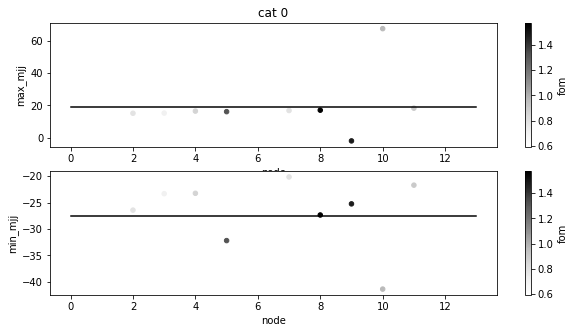

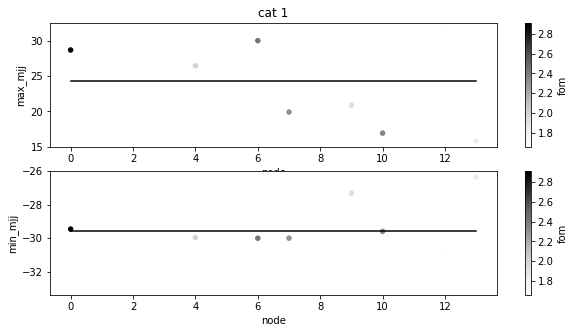

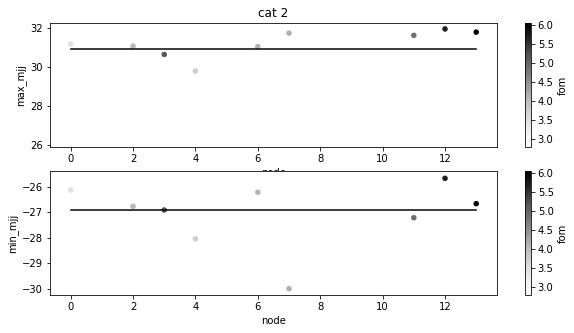

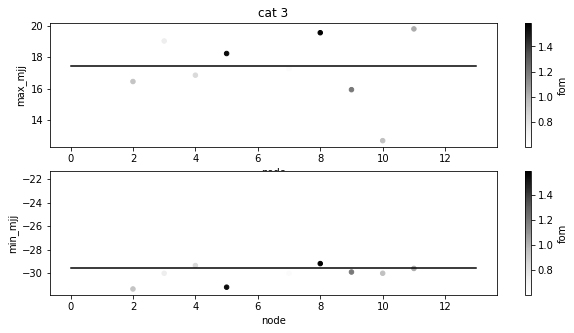

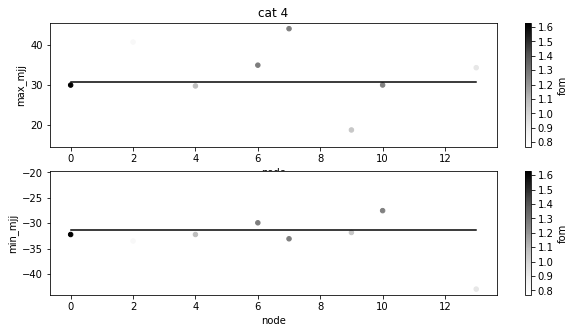

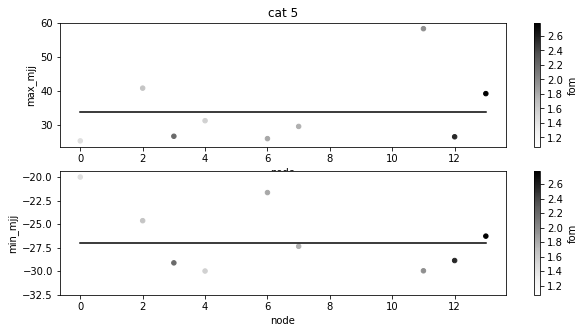

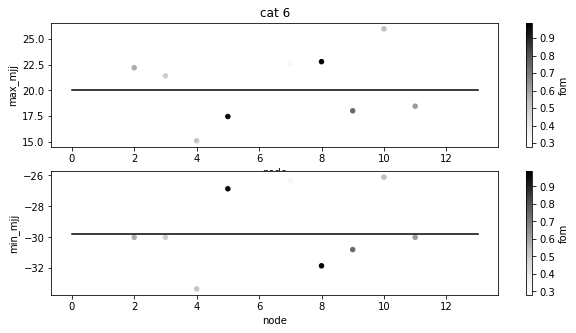

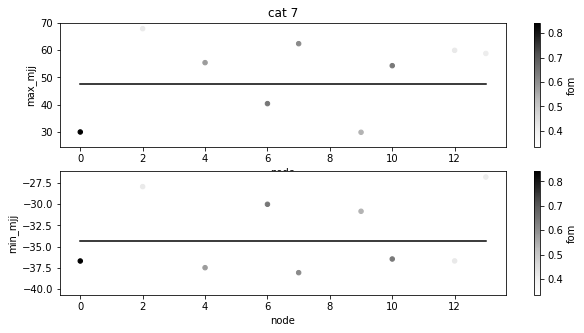

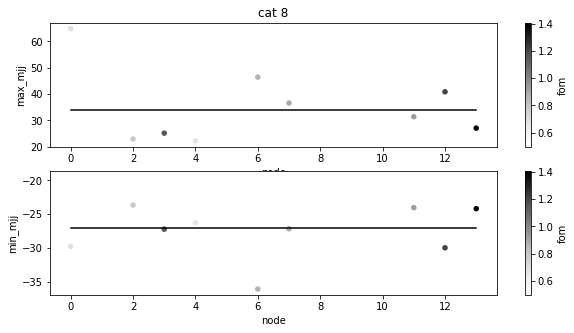

In [14]:
avgs = []

for group in grouped.groups:
    grp = grouped.get_group(group)
    min_fom = np.percentile(grp['fom'],20.)
    grp = grp[ grp['fom'] > min_fom ]
    ax = plt.subplot(2,1,1)
    plt.title('cat %d' % group)
    grp.plot.scatter( 'node', 'max_mjj', c='fom', ax=ax)    
    max_avg = (grp['max_mjj'] * grp['fom']).sum() / grp['fom'].sum()
    ax.plot((0,13),(max_avg,max_avg),'k-')
    
    ax=plt.subplot(2,1,2)
    grp.plot.scatter( 'node', 'min_mjj', c='fom', ax=ax)
    min_avg = (grp['min_mjj'] * grp['fom']).sum() / grp['fom'].sum()
    ax.plot((0,13),(min_avg,min_avg),'k-')

    avgs.append([group,min_avg,max_avg])
    plt.show()

In [15]:
avgs

[[0, -27.620961965769194, 18.790065158642776],
 [1, -29.571274064798875, 24.322336463713675],
 [2, -26.918575482586164, 30.948764986761415],
 [3, -29.577491315136484, 17.444607146401985],
 [4, -31.402588278590482, 30.68833554144815],
 [5, -27.01290259188443, 33.649551041002766],
 [6, -29.798624876114967, 20.034885365047906],
 [7, -34.31171247240618, 47.56836184694628],
 [8, -27.051044646774894, 34.010552325581386]]

In [19]:
avgs = np.array(avgs)
round_to = 1.

In [24]:
rounded = np.round(avgs[:,1:3] / round_to)*round_to

In [36]:
rounded[:,1] = np.vstack( [rounded[:,1],np.ones_like(rounded[:,1])*35] ).min(axis=0)

In [37]:
rounded

array([[-28.,  19.],
       [-30.,  24.],
       [-27.,  31.],
       [-30.,  17.],
       [-31.,  31.],
       [-27.,  34.],
       [-30.,  20.],
       [-34.,  35.],
       [-27.,  34.]])

In [26]:
rounded[:,1]-rounded[:,0]

array([ 47.,  54.,  58.,  47.,  62.,  61.,  50.,  82.,  61.])

In [28]:
(rounded[:,1]+rounded[:,0])/2.

array([-4.5, -3. ,  2. , -6.5,  0. ,  3.5, -5. ,  7. ,  3.5])